In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
#I am being intentionally explicit here so that it is clear what arguments are going where
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [4]:
my_date = datetime(my_year,my_month,my_day)

In [5]:
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [6]:
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

In [7]:
type(my_date_time)
#this is an object with attributes

datetime.datetime

In [8]:
my_date_time.day

2

In [9]:
my_date_time.month

1

In [10]:
first_two = [datetime(2016,1,1),datetime(2016,1,2)]

In [11]:
type(first_two)

list

In [12]:
dt_ind = pd.DatetimeIndex(first_two) #create pandas date time index object, its a small t in time for the method, kind of stupid

In [13]:
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [14]:
data = np.random.randn(2,2)
data

array([[-2.34207856, -0.51738407],
       [ 0.17120204,  0.37821166]])

In [15]:
cols = ['a','b']

In [16]:
df = pd.DataFrame(data,dt_ind,cols)

In [17]:
df

,a,b
2016-01-01,-2.342079,-0.517384
2016-01-02,0.171202,0.378212


<p> This is the main way we will see financial data, a Time Series Index with columns of other values </p>

In [18]:
df.index.argmax() #the index at position 1 is the max in this case

1

In [19]:
df.index.max() #returns the value instead of the index location

Timestamp('2016-01-02 00:00:00')

<h3> Now we are going to jump into Time Resampling </h3>

<p> For our project we are going to get data that has a DateTime Index on a smaller time scale (every day, hour, 5 minutes, etc).  As such it is often a good idea for analysis purposes to aggregate the data based off some frequency (Monthly, Quarterly). While a groupby could solve part of this issue, a simple groupby isn't smart enough to understand things like business quarters or business year starts.  Pandas comes with frequency sampling tools that help with this.</p>

<p> I am including a csv of stock market data set to Walmart prices to help illustrate this </p>

In [20]:
df = pd.read_csv('walmart_stock.csv')

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [30]:
#first problem I see is the date column is not the index
df.info()
#Second problem is the Date is a string 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
df.info() #that looks better

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [33]:
df.set_index('Date',inplace=True) #inplace makes it permanent, it defaults at false

In [34]:
df.head() #Now it looks like the data we pulled from Yfinance in the last notebook

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [35]:
#There is a faster way, but it doesn't always work

df2 = pd.read_csv('walmart_stock.csv',index_col='Date',parse_dates=True) 
#these arguments set invoice and attempt to convert string to date on input
#it works good unless there is a weird date format, then we have to do it the kosher way
df2.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [36]:
df2.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [37]:
df.index #They are the same, so I will continue using df not df2

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [42]:
df.resample(rule='B').mean() #There is a table for rules for resampling, it works like a grou

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215
...,...,...,...,...,...,...
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087


<p> Resampling works like a group by in that it needs an aggregate function to provide meaningful output and not just an object</p>
<p>There is a table of rules below</p>

<table>
<thead>
<tr>
<th>Alias</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>B</td>
<td>Business day</td>
</tr>
<tr>
<td>D</td>
<td>Calendar day</td>
</tr>
<tr>
<td>W</td>
<td>Weekly</td>
</tr>
<tr>
<td>M</td>
<td>Month end</td>
</tr>
<tr>
<td>Q</td>
<td>Quarter end</td>
</tr>
<tr>
<td>A</td>
<td>Year end</td>
</tr>
<tr>
<td>BA</td>
<td>Business year end</td>
</tr>
<tr>
<td>AS</td>
<td>Year start</td>
</tr>
<tr>
<td>H</td>
<td>Hourly frequency</td>
</tr>
<tr>
<td>T, min</td>
<td>Minutely frequency</td>
</tr>
<tr>
<td>S</td>
<td>Secondly frequency</td>
</tr>
<tr>
<td>L, ms</td>
<td>Millisecond frequency</td>
</tr>
<tr>
<td>U, us</td>
<td>Microsecond frequency</td>
</tr>
<tr>
<td>N, ns</td>
<td>Nanosecond frequency</td>
</tr>
</tbody>
</table>

In [44]:
df.resample(rule='BQ').mean() #Not in table, means Business Quarterly

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-29,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-28,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-29,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-28,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [45]:
def first_day(entry):
        return entry[0]

In [46]:
df.resample('A').apply(first_day) #A resamples based on year end

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


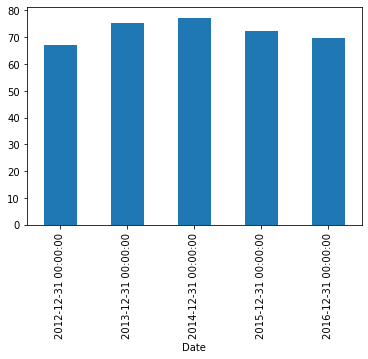

In [47]:
df['Close'].resample('A').mean().plot(kind='bar') #by yearend

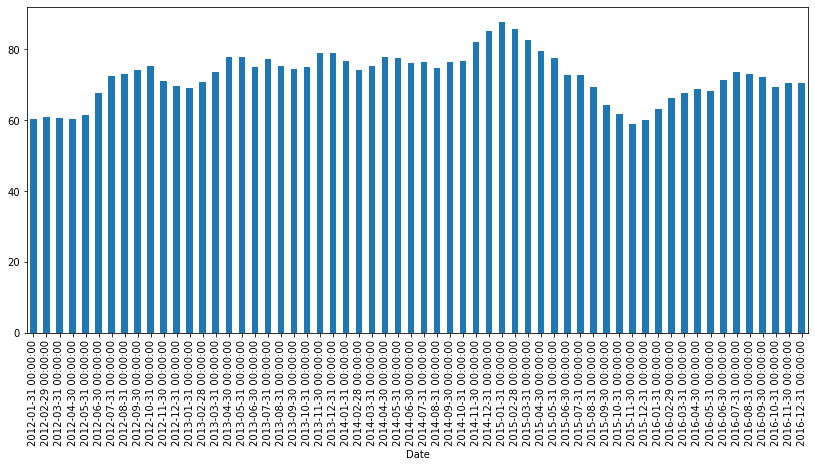

In [48]:
df['Close'].resample('M').mean().plot(kind='bar',figsize=(14,6)) #by month

<p> Note that this is a bar plot not a histogram, why?  Because we are using an aggregate function, meaning this is discontinuous, not a continuous plot.  Histograms are continuous. </p>

<h3> Now we will look at timeshifting </h3>
<p> For our project, we may need models where we can shift our data forward or backward a certain amount of time steps.  Pandas has a solution for this as well </p>

In [49]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [50]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


<p> The data here is by business day, but I called the head and tail so we can make a mental note, the opening day, open is at 59.9 the closing day it is at 69.1 </p>

In [51]:
df.shift(periods=1) #1 index row = 1 period, now are 59.7 is on day 2
# if you want you can check the tail and see what happened there

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
...,...,...,...,...,...,...
2016-12-23,71.239998,71.239998,69.209999,69.589996,12106800.0,69.082042
2016-12-27,69.430000,69.750000,69.360001,69.540001,4803900.0,69.032411
2016-12-28,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240


In [52]:
df.shift(periods=-1) #inverse movement

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-04,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-05,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
2012-01-06,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215
2012-01-09,59.430000,59.709999,58.980000,59.040001,6907300.0,51.494109
...,...,...,...,...,...,...
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456


<h3> Rolling and Expanding </h3>
<p> This is the last thing we will look at for this notebook </p>
<p> Pandas comes with methods to create things like a rolling mean based off of a given time period.</p>
<p> Often daily financial data can be very noisy.  We can use the rolling mean (in finance speak the Moving Average) to get more signal about the general trend of the data. </p> <p> We provide a window of a set time period and then use that to calculate aggregate statistics such as the mean </p>

In [54]:
df.head() #Look at data one more time

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


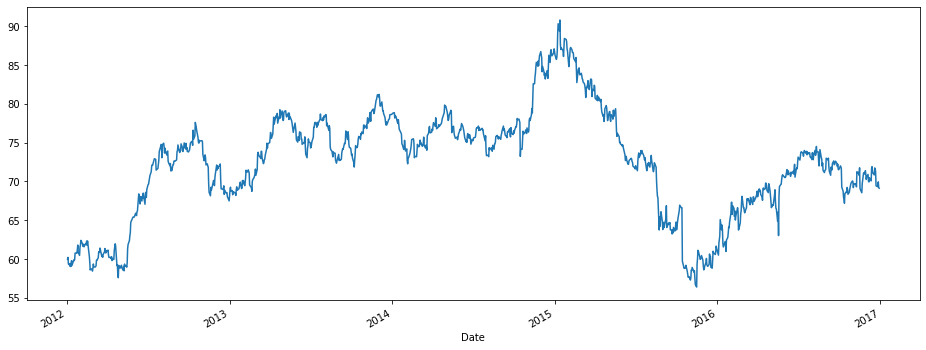

In [55]:
df['Open'].plot(figsize=(16,6)) #

<p> Looking at the data visually, you can see a ton of noise because it is daily data.  This would look a lot smoother if we did say the moving average by week </p>

In [56]:
df.rolling(7).mean().head(14)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<p> so the first 6 turn null because the window is 7 so there wasn't enough data to do the aggregation.  From point 7 on we have an average that moves and is always the average of the previous 7 days.  So lets look at this visually </p>

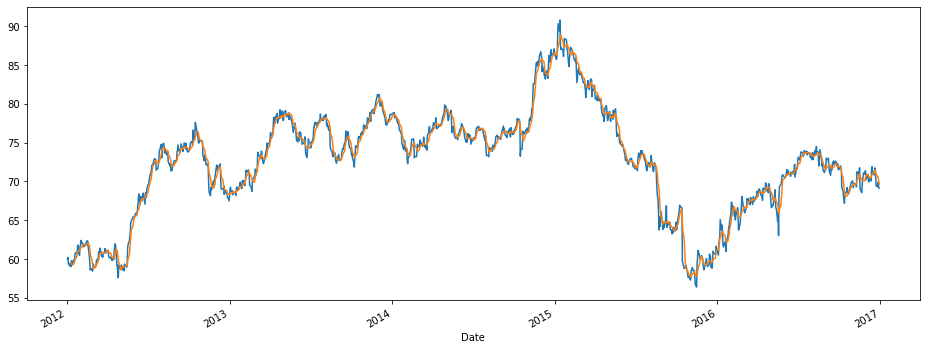

In [57]:
df['Open'].plot()
df.rolling(window=7).mean()['Close'].plot(figsize=(16,6))

<p> You can see the orange line which is the close is much smoother than the blue because I applied the moving average to the close but not the open </p>

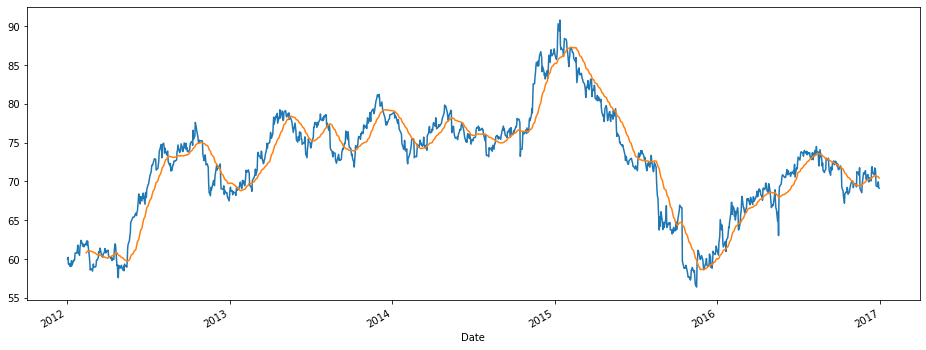

In [58]:
#I will exagerate the effect by making the window = 30 so you can really see as we do smoothing a lot in finance
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6))

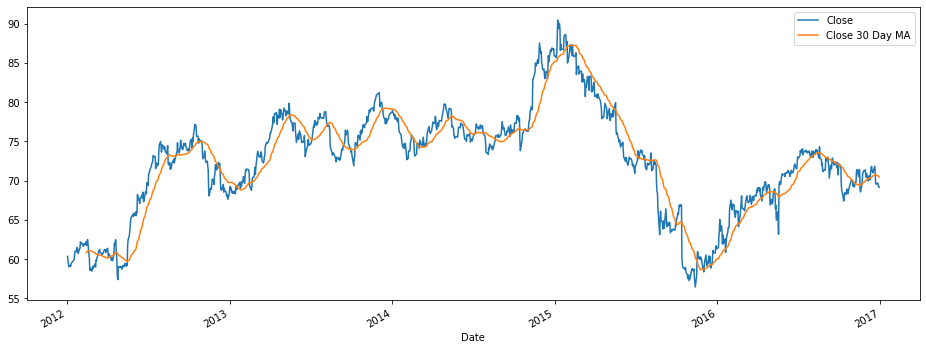

In [61]:
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close','Close 30 Day MA']].plot(figsize=(16,6)) 

#Here added the Moving Average as a column and called together in the plot to generate an automatic legend

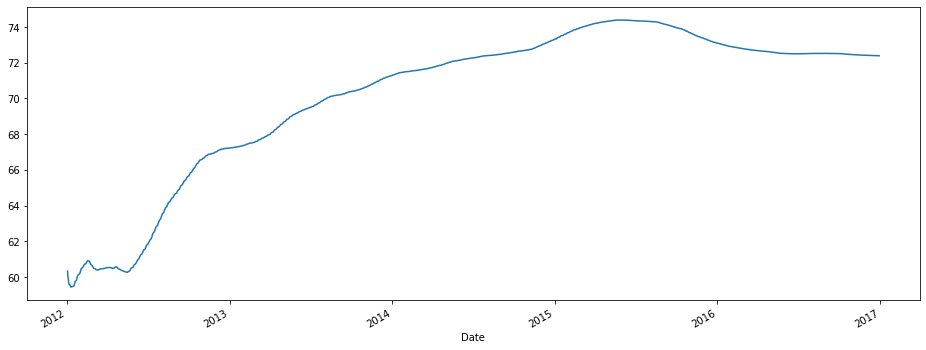

In [62]:
df['Close'].expanding().mean().plot(figsize=(16,6))

<p> The expanding mean here at any given point x is the average of all points y that have come before </p>
<p> So the very last point is the average of every point in the csv </p>
<p> This shows major trends and is sometimes helpful depending on the length of the trend </p>

<p> We will use rolling a lot more often than expanding </p>
<h3> Bollinger Bands </h3>
<p> I lied, one more concept in this notebook </p>
<h4> This is important </h4>
<p> A very common technical indicator is called the bollinger band <p>
<p> Bollinger Bands, named after their inventor John Bollinger are volatility indicators placed above and below a moving average, where the volatility is based on the standard deviation which changes as volatility increases and decreases.  The bands automatically widen when volatility increases and narrow when volatility decreases.  Finance professionals use Bollinger Bands to measure the strength of a trend as well as help measure the tops and bottoms of securities. </p>
    <p> Typically Bollinger Bands use a 20 day mean on the closing price.  We will rely on these to determine if a price movement is significant or not  </p>
    

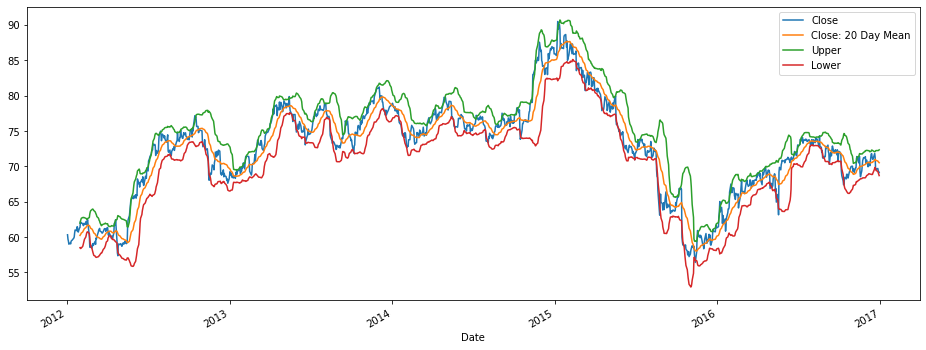

In [65]:
# 1. Create Closing Price 20 Day Moving Average (20MA)
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()
# 2. Create Upper Band:  Upper = 20MA + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())
# 3. Create Lower Band:  Lower = 20MA -2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())
# 4. Close Column


#5. Plot

df[['Close','Close: 20 Day Mean', 'Upper', 'Lower']].plot(figsize=(16,6))

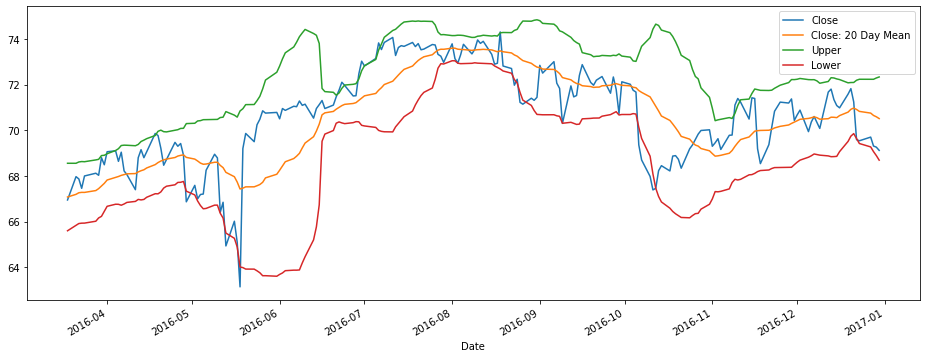

In [66]:
#Its hard to see so I will narrow it by just looking at the tail
df[['Close','Close: 20 Day Mean', 'Upper', 'Lower']].tail(200).plot(figsize=(16,6))

<p> Notice how the blue which is the price almost never crosses the Bolinger Bands, it almost always stays inside.  This is very useful information for say pricing options.  If we were to sell the appropriate options outside of these bands, our buyers would almost never execute on them for example, because there would rarely be an incentive too. </p>

<p> There are also a TON of trend analysis implications and it is all based on the rolling mean which we can do in pandas </p>